By: Briana Waters - 906176036

# Introduction

This project focuses on a Spotify dataset to analyze how a variety of factors can impact the popularity of a song across different genres. The dataset includes information on artists, popularity, duration, key, tempo, genre, and more.

## Key Questions
1. What genre of music is the most popular?
2. How does energy effect music popularity?
3. What is the relationship between number of releases and popularity?

# Data Cleaning and Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#read the data
df = pd.read_csv("Spotify_track.csv")

#drop the unnamed column that was most likely for indexing
df = df.drop(columns = 'Unnamed: 0')

#handle missing values
df[df.isnull().any(axis=1)]
#dropping this song since it is missing information
df.drop([65900], inplace=True)
df.isnull().sum()

#change variable types if needed
df['track_genre'] = df['track_genre'].astype('category')
df['key'] = df['key'].astype('category')

#calculate duration in seconds
df['duration_s'] = df['duration_ms'] / 1000

#look at artists and genres we are working with
print(df['track_genre'].value_counts(), "\n")
print(df['artists'].value_counts(),"\n")

#having songs with multiple releases changed the popularity avg analysis greatly, so for most of the analysis, only the track with the
#highest popularity for each track_name will be kept, but making it a new df so the original can be used later on
df_max_pop = df.loc[df.groupby('track_name')['popularity'].idxmax()].reset_index(drop=True)

#get general info once everything is fixed
df_max_pop.info()
print("\n")
df_max_pop.describe()


track_genre
acoustic             1000
afrobeat             1000
psych-rock           1000
progressive-house    1000
power-pop            1000
                     ... 
emo                  1000
electronic           1000
electro              1000
world-music          1000
k-pop                 999
Name: count, Length: 114, dtype: int64 

artists
The Beatles                                                                 279
George Jones                                                                271
Stevie Wonder                                                               236
Linkin Park                                                                 224
Ella Fitzgerald                                                             222
                                                                           ... 
Automatic Tasty                                                               1
o9                                                                            1
Pyotr Ilyich 

,popularity,duration_ms,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_s
count,73608.000000,7.360800e+04,73608.00000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000,73608.000000
mean,35.669452,2.319337e+05,0.55864,0.637058,-8.599923,0.633735,0.090028,0.330236,0.182513,0.222750,0.467372,122.098482,3.895962,231.933716
std,19.376104,1.188865e+05,0.17829,0.258265,5.326128,0.481786,0.118645,0.339184,0.330276,0.201401,0.263908,30.155420,0.458966,118.886479
min,0.000000,8.586000e+03,0.00000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.586000
25%,21.000000,1.739060e+05,0.44500,0.459000,-10.450000,0.000000,0.036100,0.016200,0.000000,0.098700,0.246000,99.067500,4.000000,173.906000
50%,36.000000,2.157060e+05,0.57300,0.680000,-7.257000,1.000000,0.049400,0.193000,0.000079,0.134000,0.455000,122.030500,4.000000,215.706000
75%,50.000000,2.681322e+05,0.69000,0.858000,-5.138750,1.000000,0.088200,0.628000,0.139000,0.288000,0.681000,140.132250,4.000000,268.132250
max,100.000000,5.237295e+06,0.98500,1.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,5237.295000


# Exploratory Data Analysis (EDA)
Analysis here will be done with duplicate tracks dropped, only keeping the track with max popularity

## Top Genres by Average Popularity

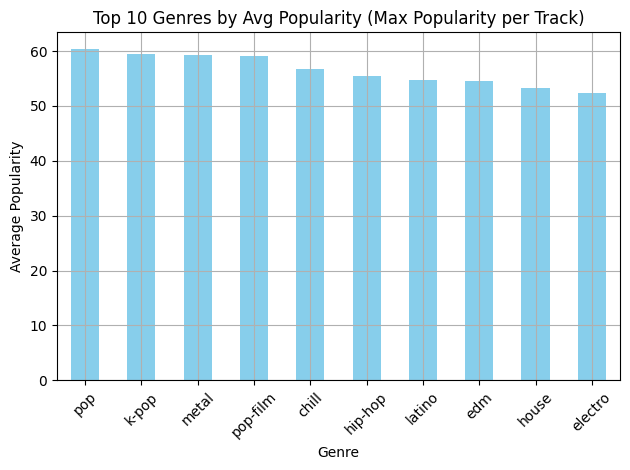

In [4]:
#group by genre and get average popularity
genre_grouped_max = df_max_pop.groupby('track_genre', observed=True)['popularity'].mean().sort_values(ascending=False)

#plot
genre_grouped_max.head(10).plot(kind='bar', color='skyblue', title='Top 10 Genres by Avg Popularity (Max Popularity per Track)')
plt.ylabel("Average Popularity")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Based on unique track names, this barplot shows that pop, k-pop, and metal are the top three genres.

## Distribution of Track Popularity

Summary Statistics for Popularity:
count    73608.000000
mean        35.669452
std         19.376104
min          0.000000
25%         21.000000
50%         36.000000
75%         50.000000
max        100.000000
Name: popularity, dtype: float64


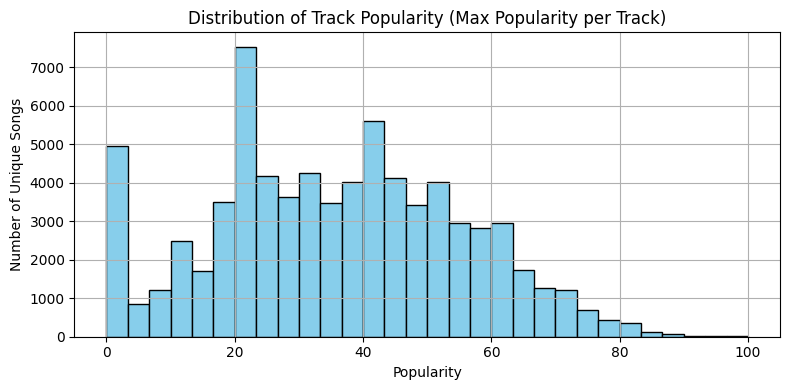

In [7]:
#popularity summary stats
print("Summary Statistics for Popularity:")
print(df_max_pop['popularity'].describe())

#plot histogram
plt.figure(figsize=(8, 4))
df_max_pop['popularity'].hist(bins=30, color='skyblue', edgecolor='black')

#label
plt.title("Distribution of Track Popularity (Max Popularity per Track)")
plt.xlabel("Popularity")
plt.ylabel("Number of Unique Songs")
plt.grid(True)
plt.tight_layout()
plt.show()

When only taking a track's max popularity into account, most of these tracks seem to fall in the 20-60 range of popularity. There is a mean of 35.67, standard deviation of 19.36, and a slightly right skewed distribution with no obvious outliers

## Popularity vs Energy

Correlation between energy and popularity (by genre): 0.059


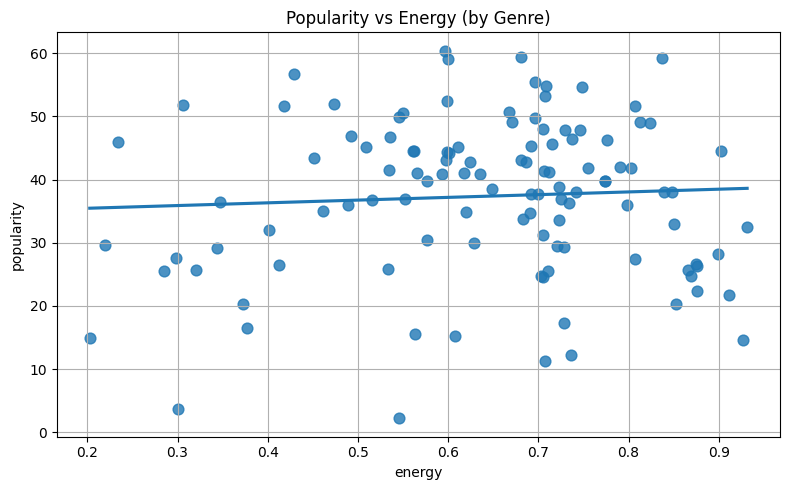

In [208]:
#group data by genre, because looking at each individual song creates confusion
genre_avg = df_max_pop.groupby('track_genre', observed=True)[['energy', 'popularity']].mean()

#calculate correlation between energy and popularity
corr = genre_avg['energy'].corr(genre_avg['popularity'])
print(f"Correlation between energy and popularity (by genre): {corr:.3f}")

#plot
plt.figure(figsize=(8, 5))
sns.regplot(data=genre_avg, x='energy', y='popularity', ci=None, scatter_kws={'s': 60})

#label
plt.title('Popularity vs Energy (by Genre)')
plt.grid(True)
plt.tight_layout()
plt.show()

This graph groups songs by genre, calculates their average energy, and plots the genres' energies against their average popularity. The correlation calculated between these two variables was 0.059, showing a weak positive linear relationship between average energy and popularity by genre. This means that it is likely other factors will be the reason for an increase in popularity

## Popularity for Explicit vs Non-Explicit

            count       mean        std  min   25%   50%   75%    max
explicit                                                             
False     67209.0  35.275097  19.196563  0.0  21.0  35.0  49.0  100.0
True       6399.0  39.811377  20.723131  0.0  23.0  40.0  56.0   98.0


Median Popularity by Explicit Label:
explicit
False    35.0
True     40.0
Name: popularity, dtype: float64


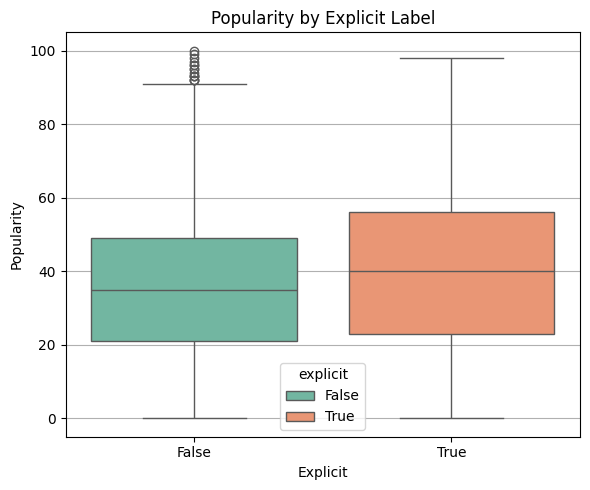

In [8]:
#summary statistics of popularity by explicit
print(df_max_pop.groupby('explicit')['popularity'].describe())
print("\n")

#calculate and show median as well
median_popularity = df_max_pop.groupby('explicit')['popularity'].median()
print("Median Popularity by Explicit Label:")
print(median_popularity)


#plot boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(data=df_max_pop, x='explicit', y='popularity', hue='explicit', palette='Set2')

#label
plt.title("Popularity by Explicit Label")
plt.xlabel("Explicit")
plt.ylabel("Popularity")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

When analyzing these boxplots that show the popularity in songs that are explicit versus songs that are not explicit, it can be seen that songs that are explicit have slightly higher popularity than their counterparts. Explicit songs have a higher median popularity of 40 compared to non-explicit median popularity of 35. The two have similar ranges, but explicit songs have a wider IQR, of 33 versus non-explicit song IQR of 28. Only non-explicit songs have outliers, most likely caused by the larger IQR for the explicit songs. Even though there are much less explicit songs, with 6399 explicit versus 67209 non-explicit, they still take over as the more popular type of songs

# Visualization
Unique track names still analyzed here unless otherwise specified

## Popularity by Number of Artists

Number of songs with more than 5 artists: 48

Summary statistics for popularity by number of artists:
                count       mean        std   min    25%   50%    75%    max
artist_count                                                                
1             55242.0  35.211397  18.904742   0.0  22.00  34.0  48.00   98.0
2             12624.0  37.390526  20.450307   0.0  21.00  40.0  53.00  100.0
3              3885.0  37.307336  21.213258   0.0  21.00  40.0  54.00   92.0
4              1110.0  34.745045  21.634159   0.0  20.00  35.0  52.00   88.0
5               386.0  33.360104  19.879046   0.0  20.25  33.0  48.00   82.0
6               149.0  32.805369  20.136251   0.0  21.00  34.0  48.00   78.0
7                91.0  30.362637  19.878250   0.0  20.50  25.0  47.50   83.0
8                40.0  35.650000  15.794433   0.0  24.00  33.0  48.25   70.0
9                16.0  37.562500  15.697001  16.0  23.50  35.5  51.50   67.0
10               17.0  28.235294  17.405205   0.0  

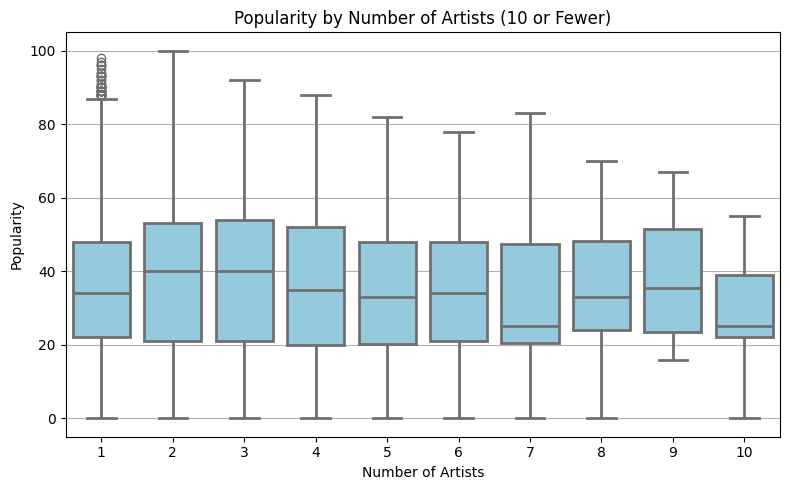

In [9]:
#make a new column that counts how many artists are on each track
df_max_pop['artist_count'] = df_max_pop['artists'].str.count(';') + 1
#checking if there is a max artist count we should keep
more_than_5 = (df_max_pop['artist_count'] > 10).sum()
print(f"Number of songs with more than 5 artists: {more_than_5}\n")
#decided on focusing in on songs with 10 or less artists, since there are under 50 songs with more than 10 artists
df_filtered = df_max_pop[df_max_pop['artist_count'] <= 10]

#summary stats
summary_stats = df_filtered.groupby('artist_count')['popularity'].describe()
print("Summary statistics for popularity by number of artists:")
print(summary_stats, "\n")

#medians
median_popularity = df_filtered.groupby('artist_count')['popularity'].median()
print("Median Popularity by Number of Artists (1–5):")
print(median_popularity)

#create boxplots based on number of artists
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, 
            x='artist_count', 
            y='popularity', 
            color='skyblue', 
            linewidth=2)

#labels
plt.title("Popularity by Number of Artists (10 or Fewer)")
plt.xlabel("Number of Artists")
plt.ylabel("Popularity")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

The median popularity is fairly similar across artist numbers, slightly increasing at 2–3 artists and dropping again from 4–7 artists. There is a slight peak once again between 8-9 songs, but that drops once more at 10 artists. Songs with 2 or 3 artists have the highest medians at 40 and widest interquartile ranges (IQRs) of 32 and 33 respectively, suggesting collaborations may benefit from wider reach or shared audiences. The variability (range and outliers) is large in every category, but is smallest among solo artists, meaning that there is either higher competition or fewer standout songs in this group.

## Popularity vs Tempo

Summary of popularity by tempo bin (with tempo > 0):
  Tempo Bin  Number of Songs  Average Popularity
0      0–60              272           30.676471
1     61–90            10625           35.181082
2    91–120            23368           36.226849
3   121–150            26275           35.502150
4   151–180            10794           35.678896
5   181–210             2099           34.652692


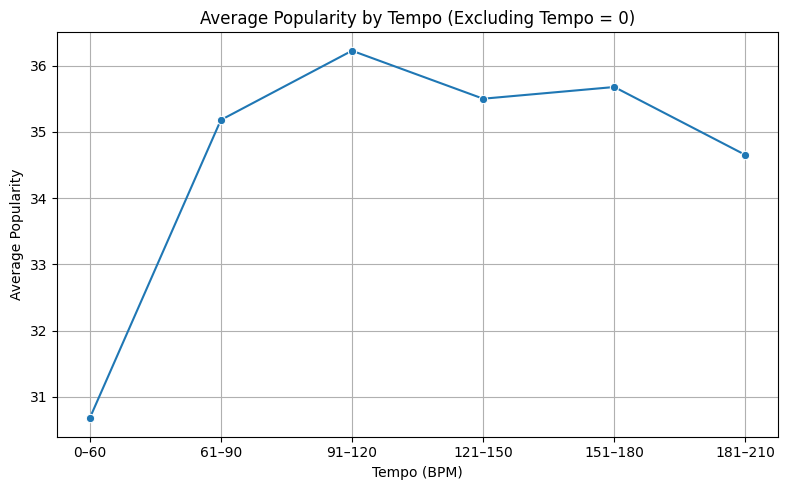

In [10]:
#remove songs with 0 tempo as an error check
df_tempo = df_max_pop[df_max_pop['tempo'] > 0].copy()

#make new column in new df
df_tempo['tempo_bin'] = pd.cut(
    df_tempo['tempo'],
    bins=[0, 60, 90, 120, 150, 180, 210],
    labels=['0–60', '61–90', '91–120', '121–150', '151–180', '181–210'],
    right=True,
    include_lowest=True
)

#get summary data
tempo_summary = df_tempo.groupby('tempo_bin', observed=True)['popularity'].agg(['count', 'mean']).reset_index()
tempo_summary.columns = ['Tempo Bin', 'Number of Songs', 'Average Popularity']
print("Summary of popularity by tempo bin (with tempo > 0):")
print(tempo_summary)

#plot
plt.figure(figsize=(8, 5))
sns.lineplot(data=tempo_summary, x='Tempo Bin', y='Average Popularity', marker='o')
plt.title("Average Popularity by Tempo (Excluding Tempo = 0)")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Average Popularity")
plt.grid(True)
plt.tight_layout()
plt.show()


Most of the data falls within the 61-180 tempo range, so the extreme ends may be less exact with their summarizations, but should be accurate near the middle. It can be seen that there is a sharp increase in popularity from 0-60 BPM to 61-90 BPM. The popularity gets even higher in the next bin, peaking at 36.23, before it begins to slowly decrease as the tempo increases. Each extreme most likely represents more niche genres of music, which tend to have lower popularity than the pop or metal genres, which most likely fall in the most popular BPM ranges. 

## Heat Map of Numerical Variables

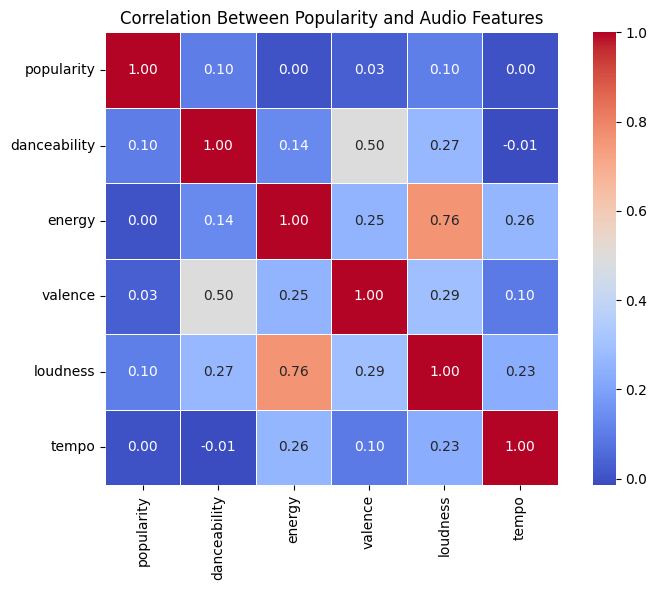

In [11]:
#get only numerical columns to calculate correlations
corr_features = df_max_pop[['popularity', 'danceability', 'energy', 'valence', 'loudness', 'tempo']]

#correlation matrix computation
correlation_matrix = corr_features.corr()

#plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)

#label
plt.title('Correlation Between Popularity and Audio Features')
plt.tight_layout()
plt.show()

This heatmap shows that there is actually a weak correlation between all of these numerical variables and popularity. Energy has a correlation of 0 woth popularity meaning it has no effect on the popularity of a song. Even though tempo has a correlation of zero, our analysis above shows a different story. This most likely has to do with the fact that the increase in popularity across tempo isn't linear. This means that the correlation cannot be used efficiently here. For the other variables, they have only little correlation to popularity, with the max coming from loudest, with a 0.1 correlation. 

## Repeated Tracks and Popularity
This analysis uses the original dataframe to look at repeat track information

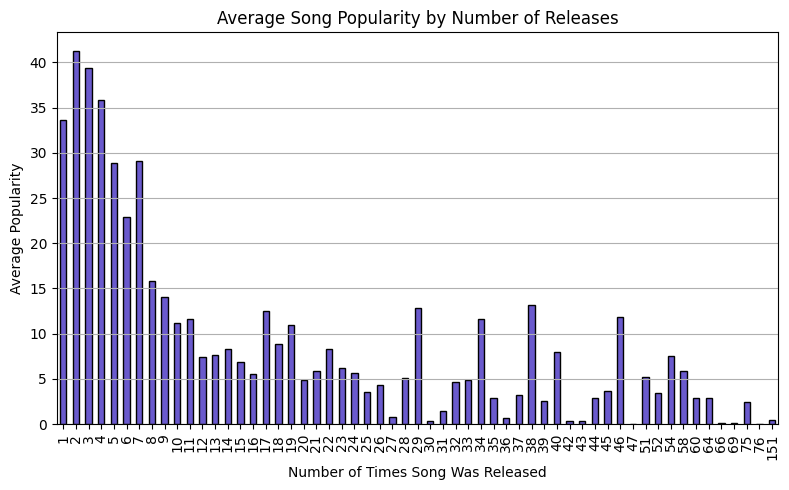

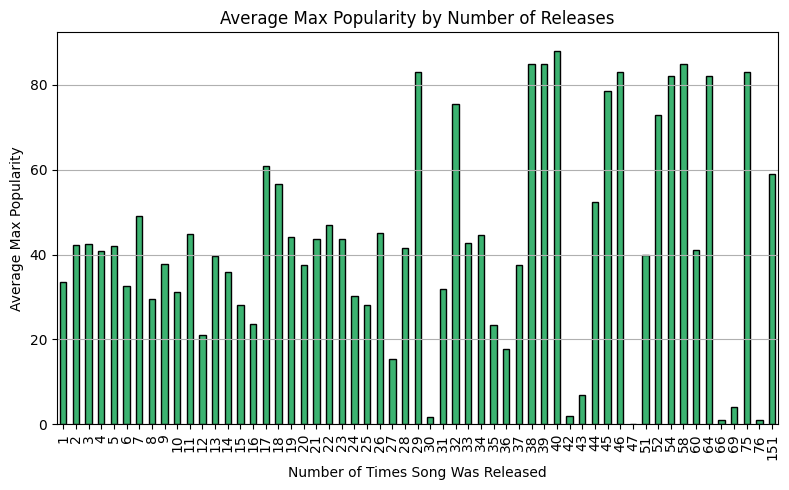

In [12]:
#group by track_name and artists to find duplicate song releases
song_release_counts = df.groupby(['track_name', 'artists']).agg(
    release_count=('track_name', 'size'),
    average_popularity=('popularity', 'mean'),
    max_popularity=('popularity', 'max')
).reset_index()


#see how average popularity varies by number of releases
popularity_by_release_count = song_release_counts.groupby('release_count')['average_popularity'].mean()

#plot the relationship
plt.figure(figsize=(8, 5))
popularity_by_release_count.plot(kind='bar', color='slateblue', edgecolor='black')
plt.title('Average Song Popularity by Number of Releases')
plt.xlabel('Number of Times Song Was Released')
plt.ylabel('Average Popularity')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


#now find the popularity based on max averages instead of overall average
popularity_by_release = song_release_counts.groupby('release_count')['max_popularity'].mean()

# Step 3: Plot
plt.figure(figsize=(8, 5))
popularity_by_release.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Average Max Popularity by Number of Releases')
plt.xlabel('Number of Times Song Was Released')
plt.ylabel('Average Max Popularity')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

The first histogram examines the average popularity of songs by the number of times they were released. Contrary to what one might expect, this plot reveals a negative relationship, showing that songs with more releases tend to have lower average popularity. This may be explained by the fact that follow-up releases (that most likely consist of remixes or duets) receive far fewer streams than the original release. This seems to take effect on songs with more than 10 releases, where average popularity drops quickly.

The second histogram was made to take a new approach to this correlation. Instead of averaging over all versions of a song, the data focuses on the most popular release of a certain repeated track. This approach provides a clearer picture of a song’s peak impact. Here, it can be observed that songs with many releases often have very high maximum popularity, suggesting that strong performance may drive multiple re-releases. 

In short, these histograms show that the initial popularity of a song will likely lead to numerous re-releases, but these re-releases do not necessarily perform as well as the original. 

# Conclusion

This project explores what makes a song popular on Spotify, and the results suggest that no single factor tells the whole story. While certain genres, energy levels, and even being explicit tend to be lead to higher popularity, the relationships seem pretty weak. We also learn that songs being released multiple times do not always do better, and in fact can often see a lower popularity on average the more they are released. On the other hand, it is the most initially popular songs that get re-released the most. So while certain features might help boost a track, popularity appears to rely more on standout individual releases than any consistent trend across musical traits.